In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("./dataset/emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [38]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [40]:
# Drop missing rows if any
df.dropna(inplace=True)

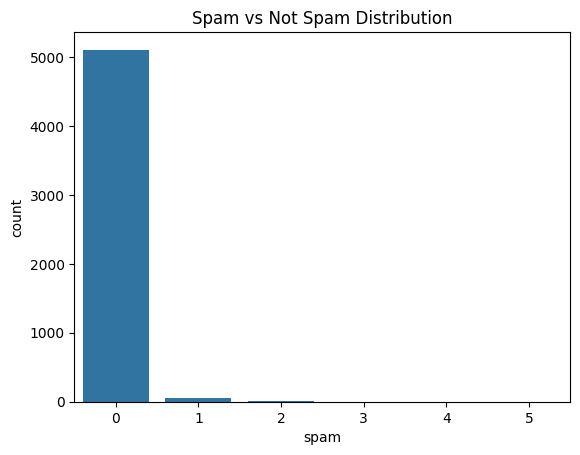

In [42]:
sns.countplot(x='spam', data=df)
plt.title("Spam vs Not Spam Distribution")
plt.show()

In [58]:
# Text feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Email No.'])
y = df['spam']


In [60]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
# K-Nearset Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn, zero_division=0))

KNN Accuracy: 0.9893719806763285

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1024
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1035
   macro avg       0.49      0.50      0.50      1035
weighted avg       0.98      0.99      0.98      1035



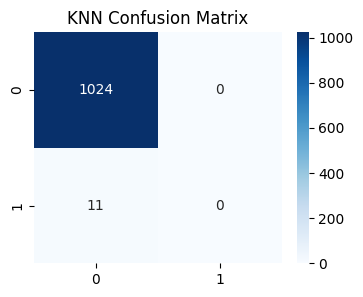

In [70]:
# Confusion matrix for KNN
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()


SVM Accuracy: 0.9893719806763285

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1024
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1035
   macro avg       0.49      0.50      0.50      1035
weighted avg       0.98      0.99      0.98      1035



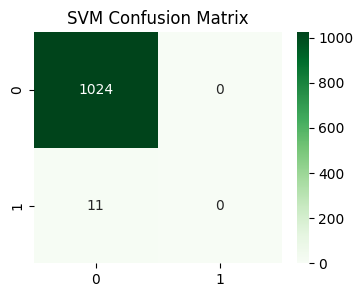

In [74]:
# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, zero_division=0))

# Confusion matrix for SVM
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

